# 姓名：陳永健（105022164）
# 大四物理系  （HW2）

In [1]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import math
np.random.random()
import random
import scipy.linalg as la
import sys
import trace

# 1D Ising model + Transfer matrix
# Question 1
* Construct the transfer matrix at temperature $T$ with external field $B$


In [2]:
def transfer_matrix(T,B):
    J = 1.0;#溫度和能量的單位
    kb = 1.0 ; #玻爾茲曼常數
    beta = 1/(kb*T);
    return np.array(([math.exp(beta*J + beta*B),math.exp(-beta*J)],[math.exp(-beta*J),math.exp(beta*J - beta*B)]))

In [3]:
P = transfer_matrix(T=60,B=20)
print('**Transfer Matrix P(T=60,B=20) =\n {}\n'.format(P))

**Transfer Matrix P(T=60,B=20) =
 [[1.41906755 0.98347145]
 [0.98347145 0.72857357]]



# Question 2:
* Find the eivenvalues of the transfer matrix and compare to the exact results.


In [4]:
#Find the eigenvalue of transfer matrix using python calculation:
A = transfer_matrix(T=60,B=20);
results = la.eig(A);
print('The eigenvalue of transfer matrix using python calculation:\n')
print('-----------------------------------------------')
print('**Transfer Matrix A(T=60,B=20) =\n {}\n'.format(A))
print('-----------------------------------------------')
list=[results[0],results[1]]
print('**Eigenvalue of A = {value[0]} and\n**Eigenvector of A = \n{value[1]}'.format(value=list))

The eigenvalue of transfer matrix using python calculation:

-----------------------------------------------
**Transfer Matrix A(T=60,B=20) =
 [[1.41906755 0.98347145]
 [0.98347145 0.72857357]]

-----------------------------------------------
**Eigenvalue of A = [2.11613125+0.j 0.03150987+0.j] and
**Eigenvector of A = 
[[ 0.81585303 -0.57825932]
 [ 0.57825932  0.81585303]]


In [5]:
#Exact solutions of transfer matrix A(T=60,B=20)
J = 1.0;#溫度和能量的單位
kb = 1.0 ; #玻爾茲曼常數

def lambda_1(T,B):
    J = 1.0;#溫度和能量的單位
    kb = 1.0 ; #玻爾茲曼常數
    beta = 1/(kb*T);
    lambda_1 = np.exp(beta*J)*np.cosh(beta*B) + np.sqrt(np.exp(-2*beta*J) + np.exp(2*beta*J)*np.sinh(beta*B)**2)
    return lambda_1

In [6]:
J = 1.0;#溫度和能量的單位
kb = 1.0 ; #玻爾茲曼常數

def lambda_2(T,B):
    J = 1.0;#溫度和能量的單位
    kb = 1.0 ; #玻爾茲曼常數
    beta = 1/(kb*T);
    lambda_2 = np.exp(beta*J)*np.cosh(beta*B) - np.sqrt(np.exp(-2*beta*J) + np.exp(2*beta*J)*np.sinh(beta*B)**2)
    return lambda_2

In [7]:
#Doing the comparison between numerical solution and exact solution:
A = transfer_matrix(T=60,B=20);
results = la.eig(A);
print('The eigenvalue of transfer matrix using python calculation:')
print('**Eigenvalue of Transfer Matrix A(T=60,B=20) =\n {}\n'.format(results[0]))
print('-----------------------------------------------')
exact_result1= (lambda_1(T=60,B=20),lambda_2(T=60,B=20))

print('The exact result of eigenvalue of transfer matrix A(T=60,B=20):')
print('**Eigenvalue of Transfer Matrix A(T=60,B=20) =\n {}\n'.format(exact_result1))

print('Conclusion: Both of the results are the same.')

The eigenvalue of transfer matrix using python calculation:
**Eigenvalue of Transfer Matrix A(T=60,B=20) =
 [2.11613125+0.j 0.03150987+0.j]

-----------------------------------------------
The exact result of eigenvalue of transfer matrix A(T=60,B=20):
**Eigenvalue of Transfer Matrix A(T=60,B=20) =
 (2.116131254747363, 0.03150986635728725)

Conclusion: Both of the results are the same.


# Question 3:
* Evaluate the partition function $Z$ at different system size $N$ and $T$, $B$. Compare to the exact results.

In [8]:
def partition_func(T,B,N):
    #T:temperaure
    #B: magnetic field
    #N: system size
    A = transfer_matrix(T,B)
    Z_cal =np.trace(np.linalg.matrix_power(A, N));
    return Z_cal
    

In [9]:
#Exact results of partition function Z
def exact_partition_func(T,B,N):
    #T:temperaure
    #B: magnetic field
    #N: system size
    J = 1.0;#溫度和能量的單位
    kb = 1.0 ; #玻爾茲曼常數
    beta = 1/(kb*T);
    Z_exact = (lambda_1(T,B)**N) + (lambda_2(T,B)**N);
    return Z_exact

In [10]:
A = transfer_matrix(T=60,B=20);
Z1 = partition_func(T=60,B=20,N=20);
Z2 = exact_partition_func(T=60,B=20,N=20);

print('The Partition Function where (T=60,B=20,N=20) using python calculation:')
print('**Partition Function = {}\n'.format(Z1))
print('-----------------------------------------------')
exact_result1= (lambda_1(T=60,B=20),lambda_2(T=60,B=20))

print('The exact result of Partition Function where (T=60,B=20,N=20):')
print('**Exact result = {}\n'.format(Z2))

print('Conclusion: Both of the results are the same.')


The Partition Function where (T=60,B=20,N=20) using python calculation:
**Partition Function = 3242291.3173027267

-----------------------------------------------
The exact result of Partition Function where (T=60,B=20,N=20):
**Exact result = 3242291.3173027327

Conclusion: Both of the results are the same.


# Question 4:
* For a fixed $N$, $T$, $B$, evaluate $\langle S_0 S_j\rangle$ where $j=0,1,\cdots N$. 
* Plot $\langle S_0 S_j\rangle$ up to $j=N/2$ and show that it decays exponentially.

In [11]:
def impurity_matrix():
    return ([1,0],[0,-1])

def correlation_func(T,B,N):
    #T:temperaure
    #B: magnetic field
    #N: system size
    #j:第幾個index
    J = 1.0;#溫度和能量的單位
    kb = 1.0 ; #玻爾茲曼常數
    beta = 1/(kb*T);
    
    Tz = np.array(impurity_matrix())
    T1 = transfer_matrix(T,B)
    SzSz = np.zeros(N+1);
    
    #now we solve for <S0Sj>
    for i in range(0,N):
        #We reset the data of Z_n and Z_szsz in this 1st loop
        Z = np.eye(2);
        Z_szsz = Tz;
        for j in range(N):
            Z = Z @ T1;
            if j == i:
                Z_szsz = Z_szsz @ Tz @ T1 
                
            else:
                Z_szsz = Z_szsz @ T1
            
            #print(j,np.trace(Z_szsz)/np.trace(Z))
            
        SzSz[i] = np.trace(Z_szsz)/np.trace(Z)
    #We can check the value of <S0Sj> using below code
    #print(SzSz)
    
    SzSz[N] = SzSz[0];
    fig, ax = plt.subplots()
    ax.plot(SzSz[0:N//2],'*')
    plt.xlabel('The j Step ', fontsize=20) 
    plt.ylabel('<${s_0}$${s_j}$>', fontsize=25)
    
    ax.text(2*N/(4*2),3/4, "  T = {}\n  B = {}\n  N = {} ".format(T,B,N), transform=ax.transData,fontsize=15)
    

It is exponentially decay.


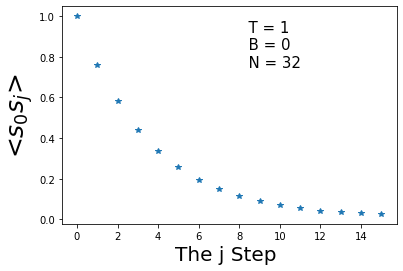

In [12]:
correlation_func(T=1,B=0,N=32)
print('It is exponentially decay.')

 # Question 5:
 * Please try several $N$, $T$, $B$. What is the largest $N$ you can go? What is the lowest $T$ you can go?


The largest N I can go when T = 1 is N =629
 We cannot run N = 630


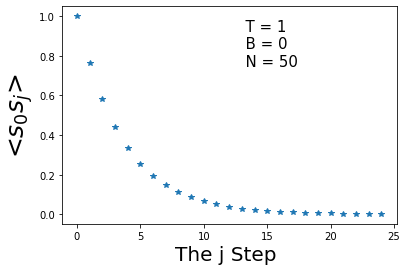

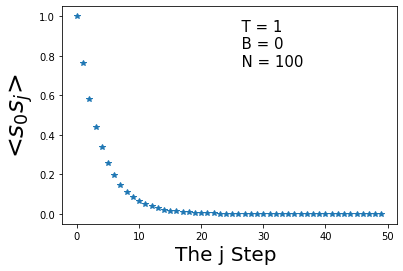

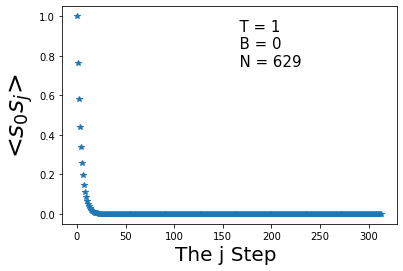

In [13]:
correlation_func(T=1,B=0,N=50)
correlation_func(T=1,B=0,N=100)
correlation_func(T=1,B=0,N=629)
print('\nThe largest N I can go when T = 1 is N =629\n We cannot run N = 630')

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in matmul
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in matmul
C:\Users\user\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:1686: RuntimeWarning: overflow encountered in reduce
  return asanyarray(a).trace(offset=offset, axis1=axis1, axis2=axis2, dtype=dtype, out=out)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in matmul


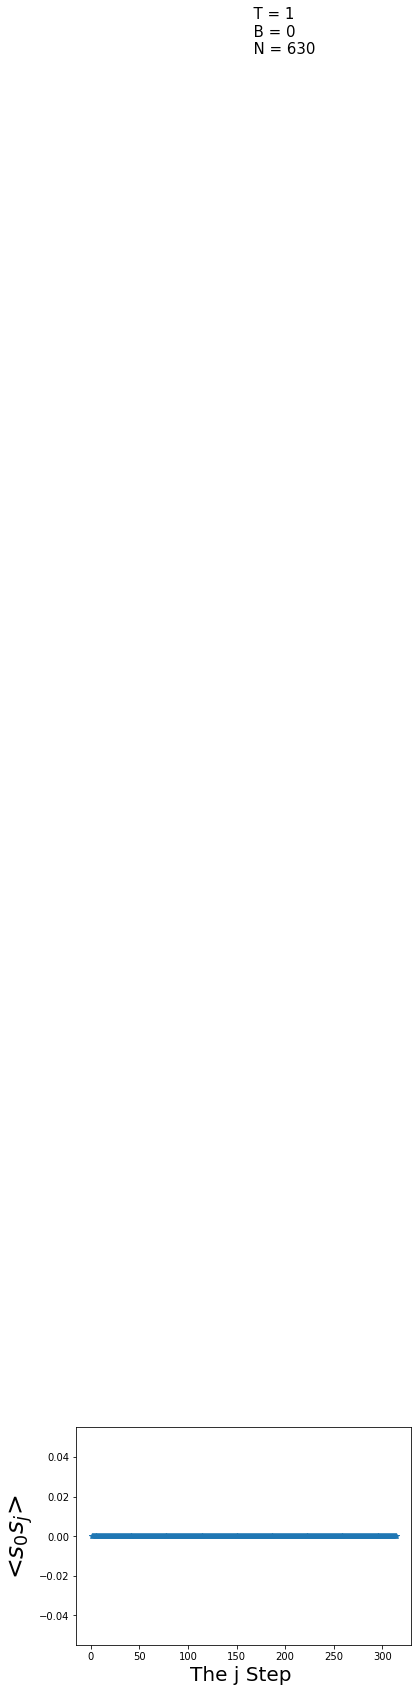

In [14]:
correlation_func(T=1,B=0,N=630)

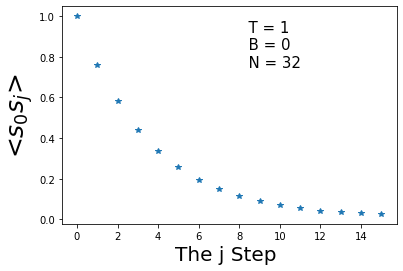

In [15]:
#run for lowest T when N = 32
correlation_func(T=1,B=0,N=32)


The lowest temperature I can go when N = 32 is T = 0.3
 We cannot run for T =0.2


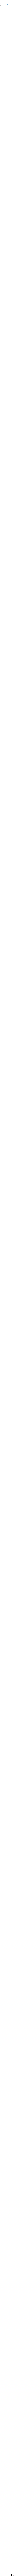

In [16]:
correlation_func(T=0.3,B=0,N=32)
print('\nThe lowest temperature I can go when N = 32 is T = 0.3\n We cannot run for T =0.2')

In [17]:
correlation_func(T=0.2,B=0,N=32)

ValueError: Image size of 449x47011808 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x288 with 1 Axes>